In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/time_series

/gdrive/My Drive/Colab Notebooks/time_series


In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
import pandas as pd
import os 
import pandas as pd 
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt 
import seaborn as sns 

from statsmodels.tsa import stattools
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('american_retail_weekly_sales.csv')
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [ ]:
data.shape

(421570, 5)

In [ ]:
exog = data.groupby('Date')['IsHoliday'].sum() > 0
exog = exog.apply(lambda x: float(x))
exog

Date
2010-02-05    0.0
2010-02-12    1.0
2010-02-19    0.0
2010-02-26    0.0
2010-03-05    0.0
             ... 
2012-09-28    0.0
2012-10-05    0.0
2012-10-12    0.0
2012-10-19    0.0
2012-10-26    0.0
Name: IsHoliday, Length: 143, dtype: float64

In [ ]:
data = data.pivot_table(index = 'Date', columns = 'Store', values = 'Weekly_Sales')

In [ ]:
data.head()

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,22516.313699,29273.828219,7101.880308,29248.546164,5115.695161,22638.836986,6898.964444,14552.711449,8862.992742,29240.650000,...,12303.861579,10938.912857,7029.336078,18097.011765,14520.924638,15303.284225,11812.695870,13479.776667,5856.061458,13293.873284
2010-02-12,22804.964444,29691.798611,6573.890000,29177.431867,4797.318462,22003.888493,7487.213143,14011.287324,8772.658413,29405.790811,...,12690.910811,11038.597917,6844.298000,17834.212254,13647.689857,15150.089296,12249.148085,14846.065000,5976.190208,9661.597647
2010-02-19,22081.755753,29102.075890,6486.802923,28080.277534,4668.424154,21765.806528,7137.472394,13770.862429,7866.583077,28179.101067,...,12375.816579,10632.968750,6544.758400,17834.666232,13089.845714,15029.067714,10383.568776,13729.115625,5582.422917,12192.232464
2010-02-26,19579.549861,25549.277671,6463.569206,26023.362703,4158.178923,19629.496027,6987.087887,12283.943623,7402.707344,26404.933684,...,11474.857436,10481.955510,6962.973542,17185.029706,12167.850845,13588.242877,10685.012609,12889.641458,5810.192979,10598.452143
2010-03-05,21298.721644,27274.152466,6590.508571,27375.797778,4513.370469,21936.285205,6921.402113,12415.548592,8052.347302,26494.534533,...,12636.932368,10385.113600,7596.732449,18089.345857,13945.806761,14979.682958,12064.617826,14317.392391,5692.345400,11611.212239


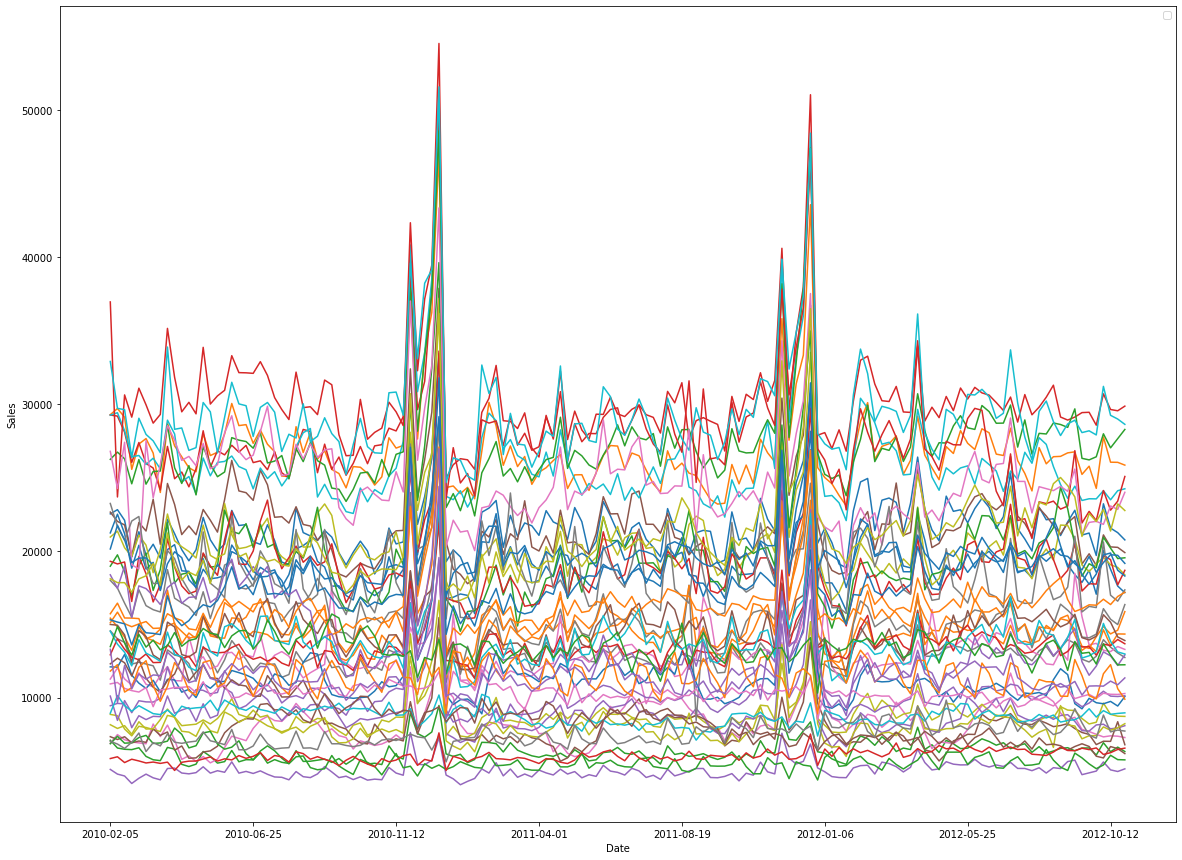

In [ ]:
ax = data.plot(figsize=(20,15))
ax.legend([])
ax.set_ylabel('Sales')
plt.show()

In [ ]:
# let's check the correlation variables
data.corr().round(2)
# more or less correlation in each stores sales is there. 

In [ ]:
data.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
           dtype='int64', name='Store')

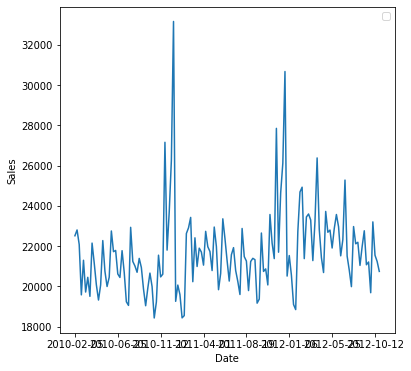

In [ ]:
# Stationarity
store1 = data.iloc[:,[0]]

ax = store1.plot(figsize=(6,6))
ax.legend([])
ax.set_ylabel('Sales')
plt.show()

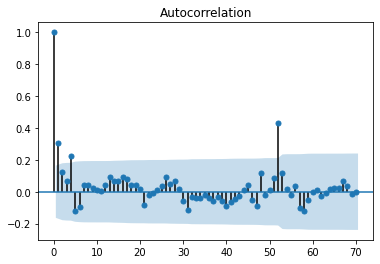

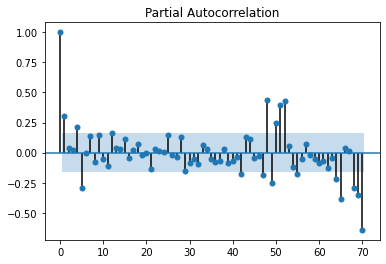

In [ ]:
plot_acf(store1.dropna(), lags=70)
plot_pacf(store1.dropna(), lags=70)
plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


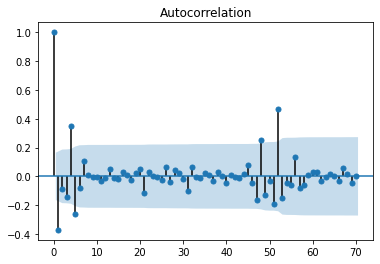

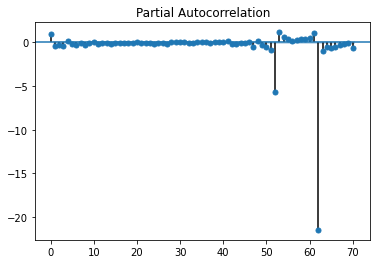

In [ ]:
plot_acf(store1.diff().dropna(), lags=70)
plot_pacf(store1.diff().dropna(), lags=70)
plt.show()

In [ ]:
# adf on original data which has a strong trend line.

from statsmodels.tsa.stattools import adfuller
result = adfuller(store1)

pvalue = result[1]

if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')

stationary


In [ ]:
# adf on original data which has a strong trend line.

from statsmodels.tsa.stattools import adfuller
result = adfuller(store1.diff().dropna())

pvalue = result[1]

if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')

stationary


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

train = data.iloc[:-10,[0,1,2]]
test = data.iloc[-10:,[0,1,2]]

In [ ]:
train_exog = exog[:-10]
test_exog = exog[-10:]

In [ ]:
mod = sm.tsa.VARMAX(train, order=(1,1), exog=train_exog)
res = mod.fit(maxiter=100, disp=False)

In [ ]:
fcst = res.forecast(exog=test_exog.values, steps=10)

mape = mean_absolute_percentage_error(test, fcst)

model_accuracy = 1 - mape

0.9623666017523522


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [ ]:
print(model_accuracy)

0.9623666017523522
